# DSFB Assignment 3 - Pre-Screening Funding Applications

By [Omid Shahmirzadi](https://ch.linkedin.com/in/omidshahmirzadi) - Email  [omid.shahmirzadi@epfl.ch](mailto:omid.shahmirzadi@epfl.ch)

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

The goal is to predict the chances that a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval and hence to save the time of volunteer reviewers so that they can focus on more solid projects.

Your machine learning algorithm can help more teachers get funded more quickly, and with less cost to DonorsChoose.org, allowing them to channel even more funding directly to classrooms across the country.

![](https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/580/cached.offlinehbpl.hbpl.co.uk/news/NST/C8B9CC1D-03B0-9B80-4CFE78B5B539240F.jpg)

Image source: https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/580/cached.offlinehbpl.hbpl.co.uk/news/NST/C8B9CC1D-03B0-9B80-4CFE78B5B539240F.jpg

Dataset source: https://www.kaggle.com/c/donorschoose-application-screening/data

As you will see, this dataset includes many different kinds of features with structured and unstructured data. You need to predict whether an application needs further study. To assess the quality of your predictions, consider the area under the curve (AUC). 

The features are listed as follows (see *application_data.csv*):

  * id - unique id of the project application  

  * teacher_id - id of the teacher submitting the application  

  * teacher_prefix - title of the teacher's name (Ms., Mr., etc.)  

  * school_state - US state of the teacher's school  

  * project_submitted_datetime - application submission timestamp  

  * project_grade_category - school grade levels (PreK-2, 3-5, 6-8, and 9-12)  

  * project_subject_categories - category of the project (e.g., "Music & The Arts")  

  * project_subject_subcategories - sub-category of the project (e.g., "Visual Arts")  

  * project_title - title of the project  

  * project_essay_1 - first essay*  

  * project_essay_2 - second essay*  

  * project_essay_3 - third essay*  

  * project_essay_4 - fourth essay*  

  * project_resource_summary - summary of the resources needed for the project  

  * teacher_number_of_previously_posted_projects - number of previously posted applications by the submitting teacher  

  * project_is_approved - whether DonorsChoose proposal was accepted (0="rejected", 1="accepted"); train.csv only  


Note: Prior to May 17, 2016, the prompts for the essays were as follows:

  * project_essay_1: "Introduce us to your classroom"  

  * project_essay_2: "Tell us more about your students"  

  * project_essay_3: "Describe how your students will use the materials you're requesting"  

  * project_essay_4: "Close by sharing why your project will make a difference"  

Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:

  * project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."  

  * project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"  


For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.

Proposals also include resources requested. Each project may include multiple requested resources (see *resource_data.csv*). Each row in *resource_data.csv* corresponds to a resource, so multiple rows may tie to the same project by id.

  * id - unique id of the project application; joins with test.csv. and train.csv on id  

  * description - description of the resource requested  

  * quantity - quantity of resource requested  

  * price - price of resource requested  

You can create a group of up to three to discuss the problem, however every body is encouraged to implement the solution on his own machine. Remember to name your group mates in your submission. 


## Part 1: Data Preperation, Data Cleaning and EDA

**Q 1:** Unlike other problems, this problem includes a big training set which is more than the standard size limit of github. Through the terminal lab of Jupyter lab, download it using wget command and unzip it using zip command and put it in the root directory of the problem. 

Locations : 

    Applications dataset: https://storage.googleapis.com/dsfm/application/application_data.csv.zip
    Resources dataset: https://storage.googleapis.com/dsfm/application/resource_data.csv.zip

Hint: Use *wget* and *unzip* commands. Use ! followed by a bash command in a cell to run a bash command.

##### Downloaded  outside the notebook

In [1]:
! wget https://storage.googleapis.com/dsfm/application/application_data.csv.zip
#! unzip https://storage.googleapis.com/dsfm/application/application_data.csv.zip
    
!wget https://storage.googleapis.com/dsfm/application/resource_data.csv.zip
#!unzip https://storage.googleapis.com/dsfm/application/resource_data.csv.zip

--2018-12-04 09:06:39--  https://storage.googleapis.com/dsfm/application/application_data.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113169833 (108M) [application/zip]
Saving to: ‘application_data.csv.zip’

application_data.cs 100%[===================>] 107.93M   180MB/s    in 0.6s    

2018-12-04 09:06:40 (180 MB/s) - ‘application_data.csv.zip’ saved [113169833/113169833]

--2018-12-04 09:06:42--  https://storage.googleapis.com/dsfm/application/resource_data.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42396552 (40M) [application/zip]
Saving to: ‘resource_data.cs

In [2]:
! unzip application_data.csv.zip
    
#!wget https://storage.googleapis.com/dsfm/application/resource_data.csv.zip
!unzip resource_data.csv.zip

Archive:  application_data.csv.zip
  inflating: application_data.csv    
Archive:  resource_data.csv.zip
  inflating: resource_data.csv       


**Q 2:** Load the datasets and investigate their features. What could be a unifying strategy to create the same ‘project essay’ columns? Apply your strategy and deal with missing values afterwards.

##### One way to proceed is to combine for every project before the 17th may of 2016 project_essay_1 with project_essay_2 and project_essay_3 with project_essay_4 to place them in project_essay_1 and project_essay2 respectively.

In [91]:
import warnings
import pandas as pd
%matplotlib inline

app_data = pd.read_csv('application_data.csv')
print(len(app_data))
app_data.head()

182080


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [92]:
from datetime import datetime
# First we convert the column dateTime to a object called datetime.date much more useful for futur use
print(type(app_data.project_submitted_datetime[0]))
app_data.project_submitted_datetime = app_data.project_submitted_datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
print(type(app_data.project_submitted_datetime[0]))
app_data.project_submitted_datetime = app_data.project_submitted_datetime.apply(lambda x: x.date() )
print(type(app_data.project_submitted_datetime[0]))

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>
<class 'datetime.date'>


In [93]:
# Now we need to merge project_essay_1 with project_essay_2 as described above
# To do so we need to use the columnproject_submitted_datime updated before

#17 may 2016
critical_date = datetime.strptime('17052016', "%d%m%Y").date()

# Loop over every rows
for index, row in app_data.iterrows():
    # Check if before critical date
    if row.project_submitted_datetime < critical_date:
        # Update project essay 1 and 2 
        app_data['project_essay_1'][index] = row['project_essay_1']+" "+row['project_essay_2']
        app_data['project_essay_2'][index] = row['project_essay_3']+" "+row['project_essay_4']
        
# try to use the following and check for time

# Concat diff columns with the following line
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


**Q 3:** Merge resources dataset into application dataset. You can aggregate the total cost of requested resources for every project and merge it into applications dataset using the *id* field. 

Hint: Use *groupby* and *agg* functions of dataframe to create aggregates. Use *merge* function of *Pandas* to merge two dataframes.

In [94]:
# load the data
resource_data = pd.read_csv('resource_data.csv')
resource_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [95]:
# multiply quantity and price in new colulmn totalPrice
# groupby ID and sum all totalprice with same ID
# we can drop the description for the resources since there is a summary of the description of the resources needed in the other DF.

resource_data['totalPrice'] = resource_data['quantity']*resource_data['price']
resource_data_update = pd.DataFrame(resource_data.groupby('id').totalPrice.agg('sum'))
resource_data_update.reset_index(inplace=True)
print(len(resource_data_update))
resource_data_update.head()

260115


,id,totalPrice
0,p000001,833.63
1,p000002,630.28
2,p000003,298.97
3,p000004,1126.22
4,p000005,702.31


In [96]:
# Now we need to merge both dataframes with respect to the ID column

merged_data = app_data.merge(resource_data_update,how='outer',on='id')

print(len(merged_data))
merged_data.head()

260115


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,totalPrice
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26.0,1.0,899.94
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1.0,0.0,400.00
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5.0,1.0,469.99
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16.0,0.0,684.47
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42.0,1.0,711.00


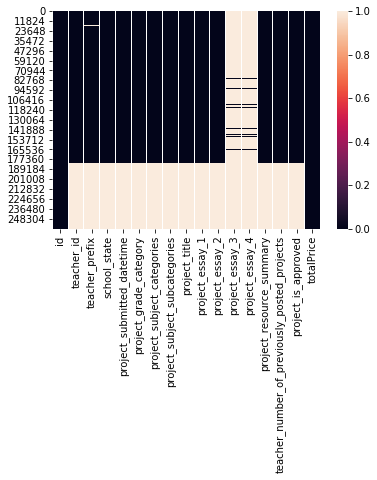

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualize pattern of missing data
sns.heatmap(merged_data.isnull())

##### We can see that since we had more ID in resource_data than in application_data we have approximatly 1/4 of the data to drop.
Moreover we need to drop the columns porject_essay_3 & project_essay_4.

We also have a nan in the teacher prefix than we need to fix before we jump to the next question

In [0]:
# drop of columns project_essay_3 and project_essay_4
merged_data.drop(labels=['project_essay_3','project_essay_4'],axis='columns',inplace=True)
# drop rows where the project title is missing
merged_data.drop(labels=merged_data[merged_data['project_title'].isnull()].index.tolist(),axis='index',inplace=True)

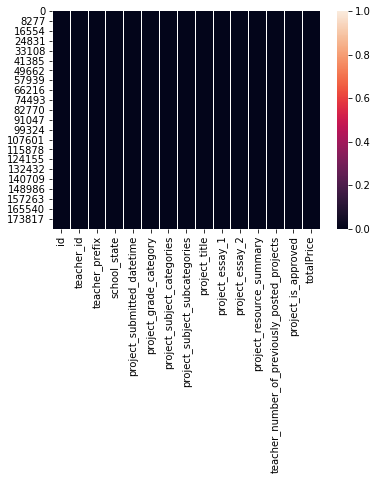

In [0]:
sns.heatmap(merged_data.isnull())

In [8]:
#check if we still have missing values
print(merged_data.isnull().values.sum())


4


We still have 4 Nan in our dataset that we we need to take care of. We decide to drop those observations.

In [98]:
print(merged_data.shape)
merged_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(merged_data.shape)

(182080, 15)
(182076, 15)


**Q 4:**  Separate your merged dataset into features and target and visualize distribution of the target. Why area under the ROC curve is a suitable classification metric?

In [99]:
import platform

print(platform.python_version())

3.6.7


In [123]:
#split features and target values

features = merged_data.drop(labels=['id','totalPrice'],axis = 'columns')
target = merged_data['totalPrice']

sns.distplot(target)

NameError: ignored

We ould prefer to have our target data looking like a gaussian. Therefore we try to applay a log transform on them

C:\Users\Julien\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


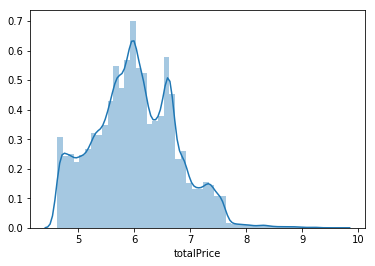

In [0]:
import numpy as np

target= np.log1p(target)
sns.distplot(target)

This distribution looks way more as a gaussian than the one before thus we will use it for the rest of the notebook

## Part 2: Encoding Categorical / DateTime Features

**Q 1:** What would be a possible issue with one hot encoding of teacher_id column? Can you think of another way to encode this feature?

**Since all the teachers ID are different if we one hot encod the colomn then we would add roughly 150000 features which is way too much. Anyway the teacher ID is not really relevant. We could instead count the number of time a teacher is maker a query and therefore replace "teacher_id" column by nb of demand by this teacher ( "nbProject_teacher")**

In [124]:
#DROP TEACHER ID OR NOT
#for index,row in features.iterrows():
value_count = features.teacher_id.value_counts()
#print((value_count))
print(value_count['fa2f220b537e8653fb48878ebb38044d'])
#print(value_count[value_count.index ==fa2f220b537e8653fb48878ebb38044d].teacher_id)


features['nbProject_teacher']=features['teacher_id'].apply(lambda x: value_count[x])

features.drop(columns="teacher_id",inplace=True,axis='columns')

features.head()

74


,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,nbProject_teacher
0,Ms.,NV,2016-11-18,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,My students need 6 Ipod Nano's to create and d...,26.0,1.0,10
1,Mrs.,GA,2017-04-26,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,My students need matching shirts to wear for d...,1.0,0.0,1
2,Ms.,UT,2017-01-01,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,My students need the 3doodler. We are an SEM s...,5.0,1.0,4
3,Mr.,NC,2016-08-12,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",My students need balls and other activity equi...,16.0,0.0,16
4,Mr.,CA,2016-08-06,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,My students need a water filtration system for...,42.0,1.0,10


**Q 2:** Encode categorical features of (teacher_prefix, school_state, project_grade_category) using one-hot-encoding.

In [125]:
data = pd.get_dummies(data=features, columns = ['teacher_prefix','school_state','project_grade_category'] )
print(data.shape)

(182076, 70)


**Q 3:** What could be the issue with one-hot-encoding of project_subject_category and project_subject_subcategory ? Come up with a sensible solution and implement it.

Hint: Understand and use the following function to encode categories and subcategories:

    def getCatFeatures(df, Col):
        vectorizer = CountVectorizer(binary=True,
                                     ngram_range=(1,1),
                                     tokenizer=lambda x:[a.strip() for a in x.split(',')])
        return (vectorizer.fit_transform(df[Col]), vectorizer.vocabulary_)
        
To concat two sparse matrices, use *hstack* function from *scipy.sparse* package. To create a dataframe from an sparse matrix SM, use the following function:

    pd.SparseDataFrame([ pd.SparseSeries(SM[i].toarray().ravel()) for i in np.arange(SM.shape[0]) ])
    
Convert your sparse matrices to *csr* format before converting it to a dataframe using the following function:

    SM.tocsr()

In [0]:
!pip install -q numpy
import numpy as np

In [126]:
"""The issue with one-hot-encoding of both project_subject_category & project_subject_subcategory is the following.
Since we have some categories which are the combination of two categorizes we cannot use one hot encoded. it will lead to too 
many features instead of combining differents descriptions of categorizes"""
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer

def getCatFeatures(df, Col):
    vectorizer = CountVectorizer(binary=True,
                                 ngram_range=(1,1),
                                 tokenizer=lambda x:[a.strip() for a in x.split(',')])
    return (vectorizer.fit_transform(df[Col]), vectorizer.vocabulary_)

# First We Combine both Columns : project_subject_category & project_subject_subcategory
#data['project_subject_category'] = project_subject_category+' '+project_subject_subcategory
# Then we replace all the '&' by a ','
data['project_subject_categories'] = data['project_subject_categories'].str.replace('&',',')
data['project_subject_subcategories'] = data['project_subject_subcategories'].str.replace('&',',')
# Now  we can use our function getCatFeatures
vectorize_matrix_cat, columns_name_cat = getCatFeatures(data,'project_subject_categories')
vectorize_matrix_subcat, columns_name_subcat = getCatFeatures(data,'project_subject_subcategories')

# We concat both sparse matrices and convert it to csr
concat_SM = hstack((vectorize_matrix_cat, vectorize_matrix_subcat)).tocsr()

# Convert our matrix to a dataframe
#cat_df = pd.SparseDataFrame([ pd.SparseSeries(concat_SM[i].toarray().ravel()) for i in np.arange(concat_SM.shape[0]) ])
cat_df = pd.DataFrame([ pd.SparseSeries(concat_SM[i].toarray().ravel()) for i in np.arange(concat_SM.shape[0]) ])

cat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
print(columns_name_cat)
print(len(columns_name_cat))
print(columns_name_subcat)
print(len(columns_name_subcat))
print(cat_df.columns.values)

dic_col_cat=columns_name_cat
dic_col_subca=columns_name_subcat

#Update the value of the subcat columns name
for key, value in dic_col_subca.items():
    dic_col_subca[key]=value+15
print(dic_col_subca)

# Create an array with the name corresponding to each column
col_list = list(np.arange(52))

for key, value in dic_col_cat.items():
    col_list[value]=key
for key, value in dic_col_subca.items():
    col_list[value]=key
#print final column list
print(col_list)

{'literacy': 7, 'language': 6, 'music': 9, 'the arts': 13, 'health': 3, 'sports': 12, 'math': 8, 'science': 10, 'applied learning': 0, 'special needs': 11, 'history': 4, 'civics': 2, 'warmth': 14, 'care': 1, 'hunger': 5}
15
{'literacy': 22, 'performing arts': 29, 'team sports': 32, 'applied sciences': 0, 'literature': 23, 'writing': 36, 'health': 18, 'wellness': 35, 'character education': 3, 'early development': 7, 'mathematics': 24, 'special needs': 31, 'esl': 10, 'life science': 21, 'college': 5, 'career prep': 2, 'environmental science': 9, 'other': 27, 'social sciences': 30, 'music': 25, 'visual arts': 33, 'history': 19, 'geography': 15, 'parent involvement': 28, 'extracurricular': 11, 'gym': 17, 'fitness': 13, 'warmth': 34, 'care': 1, 'hunger': 20, 'foreign languages': 14, 'nutrition education': 26, 'community service': 6, 'financial literacy': 12, 'civics': 4, 'government': 16, 'economics': 8}
37
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 2

In [128]:
# Create Dataframe with the sparse dataframe and the name of columns
cat_df.columns = col_list
cat_df.head()

,applied learning,care,civics,health,history,hunger,language,literacy,math,music,...,other,parent involvement,performing arts,social sciences,special needs,team sports,visual arts,warmth,wellness,writing
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [129]:
# Now we merge this df with our data

print(len(cat_df))
print(len(data))
#In [11]: result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])

data= pd.concat([data,cat_df],axis=1,join_axes=[data.index])

# Drop project categories and subcategories
data.drop(columns="project_subject_categories",inplace=True,axis='columns')
data.drop(columns="project_subject_subcategories",inplace=True,axis='columns')

print(len(data))
data.head()

182076
182076
182076


,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,nbProject_teacher,teacher_prefix_Dr.,teacher_prefix_Mr.,...,other,parent involvement,performing arts,social sciences,special needs,team sports,visual arts,warmth,wellness,writing
0,2016-11-18,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,My students need 6 Ipod Nano's to create and d...,26.0,1.0,10,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-04-26,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,My students need matching shirts to wear for d...,1.0,0.0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2017-01-01,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,My students need the 3doodler. We are an SEM s...,5.0,1.0,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-08-12,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",My students need balls and other activity equi...,16.0,0.0,16,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2016-08-06,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,My students need a water filtration system for...,42.0,1.0,10,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Q 4:** What could be a sensible strategy to encode project_submitted_datetime feature? Why simply separate it into different numeric features for year/month/day/hour can be problematic?

Hint: Consider circular temporal features such as month, day of month, day of week, hour and dicuss about their appropriate encoding.

In [108]:
"""The use of the library datetime might be a a good strategy to encode project_submitted_datetime
If we separate it into different numeric featuress our model might interpret some date as a sum of 2 dates 
which might leads to a disaster. We already convert the column in the part 1 as follow:

from datetime import datetime
# First we convert the column dateTime to a object called datetime.date much more useful for futur use
print(type(data.project_submitted_datetime[0]))
data.project_submitted_datetime = app_data.project_submitted_datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
print(type(data.project_submitted_datetime[0]))
data.project_submitted_datetime = app_data.project_submitted_datetime.apply(lambda x: x.date() )
print(type(data.project_submitted_datetime[0]))

Since the date are not ordinal but categorical we will use one hot encoded to treat them.
We will separete the months the years and the days.
We will drop the Time(Hours) since it seems that it does not matter a lot and there are multiple Timezone in the US.
We will also add the Day of the Week (the day of the week as an integer, where Monday is 0 and Sunday is 6.)
"""
#Extract column date from the dataframe
date = pd.DataFrame(data.project_submitted_datetime)

# We create 4 new columns 
date['Year'] = ""
date['Month'] = ""
date['Day'] = ""
date['DayOfWeek'] = ""
# We update the values of the columns
for index,row in date.iterrows():
    date['Year'][index] = row.project_submitted_datetime.year
    date['Month'][index] = row.project_submitted_datetime.month
    date['Day'][index] = row.project_submitted_datetime.day
    date['DayOfWeek'][index] = row.project_submitted_datetime.weekday()
    

"""# We create 4 new columns 
date['Year'] = date.apply(lambda x: x.year)
date['Month'] = date.apply(lambda x: x.month)
date['Day'] = date.apply(lambda x: x.day)
date['DayOfWeek'] = date.apply(lambda x: x.weekday())"""

date.head()

,project_submitted_datetime,Year,Month,Day,DayOfWeek
0,2016-11-18,2016,11,18,4
1,2017-04-26,2017,4,26,2
2,2017-01-01,2017,1,1,6
3,2016-08-12,2016,8,12,4
4,2016-08-06,2016,8,6,5


In [130]:
print(len(date))
print(len(data))
date.drop(columns="project_submitted_datetime",inplace=True,axis='columns')

data = pd.concat([data,date],axis=1,join_axes=[data.index])
data.drop(columns="project_submitted_datetime",inplace=True,axis='columns')

print(len(data))
data.head()

182076
182076
182076


,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,nbProject_teacher,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,...,special needs,team sports,visual arts,warmth,wellness,writing,Year,Month,Day,DayOfWeek
0,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,My students need 6 Ipod Nano's to create and d...,26.0,1.0,10,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016,11,18,4
1,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,My students need matching shirts to wear for d...,1.0,0.0,1,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,2017,4,26,2
2,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,My students need the 3doodler. We are an SEM s...,5.0,1.0,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2017,1,1,6
3,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",My students need balls and other activity equi...,16.0,0.0,16,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2016,8,12,4
4,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,My students need a water filtration system for...,42.0,1.0,10,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2016,8,6,5


## Part 3: Encoding Textual Features

**Q 1:** Concat all textual fields into a single field and preprocess them using the steps we used in sentiment analysis demo (lower case, stop word removal, remove terms with digits, stemming). 

In [131]:
# Find the name of all the textual features
col = np.array(data.columns)
#print(col)

textual_features = ['project_title','project_resource_summary','project_essay_1','project_essay_2']

tmp = data[textual_features].apply(lambda x : x[0]+""+x[1]+""+x[2]+""+x[3],axis=1)

data['text']=tmp
#print(tmp)
print(data.text[0])
print('puteeeeeeeeeeeeeeeee')
print(data.project_title[0])
print('puteeeeeeeeeeeeeeeee')
print(data.project_essay_1[0])
print('puteeeeeeeeeeeeeeeee')
print(data.project_essay_2[0])

data.drop(columns=textual_features,inplace=True,axis='columns')

Super Sight Word CentersMy students need 6 Ipod Nano's to create and differentiated and engaging way to practice sight words during a literacy station.Most of my kindergarten students come from low-income households and are considered \"at-risk\". These kids walk to school alongside their parents and most have never been further than walking distance from their house. For 80% of my students, English is not their first language or the language spoken at home. \r\n\r\nWhile my kindergarten kids have many obstacles in front of them, they come to school each day excited and ready to learn. Most students started the year out never being in a school setting. At the start of the year many had never been exposed to letters. Each day they soak up more knowledge and try their hardest to succeed. They are highly motivated to learn new things every day. We are halfway through the year and they are starting to take off. They know know all letters, some sight words, numbers to 20, and a majority of 

In [132]:
#remove terms with digits-----------------------------------------------------------------------
import re

data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))  
print(data['text'][0])

Super Sight Word CentersMy students need   Ipod Nano s to create and differentiated and engaging way to practice sight words during a literacy station Most of my kindergarten students come from low income households and are considered   at risk    These kids walk to school alongside their parents and most have never been further than walking distance from their house  For     of my students  English is not their first language or the language spoken at home   r n r nWhile my kindergarten kids have many obstacles in front of them  they come to school each day excited and ready to learn  Most students started the year out never being in a school setting  At the start of the year many had never been exposed to letters  Each day they soak up more knowledge and try their hardest to succeed  They are highly motivated to learn new things every day  We are halfway through the year and they are starting to take off  They know know all letters  some sight words  numbers to     and a majority of 

In [133]:
print(data['text'][0])

Super Sight Word CentersMy students need   Ipod Nano s to create and differentiated and engaging way to practice sight words during a literacy station Most of my kindergarten students come from low income households and are considered   at risk    These kids walk to school alongside their parents and most have never been further than walking distance from their house  For     of my students  English is not their first language or the language spoken at home   r n r nWhile my kindergarten kids have many obstacles in front of them  they come to school each day excited and ready to learn  Most students started the year out never being in a school setting  At the start of the year many had never been exposed to letters  Each day they soak up more knowledge and try their hardest to succeed  They are highly motivated to learn new things every day  We are halfway through the year and they are starting to take off  They know know all letters  some sight words  numbers to     and a majority of 

In [134]:
#lower case-----------------------------------------------------------------------------
# Lower case and separate into tokens
features=0

data['text'] = data['text'].apply(lambda x: x.lower().split())  

print(data['text'][0])

['super', 'sight', 'word', 'centersmy', 'students', 'need', 'ipod', 'nano', 's', 'to', 'create', 'and', 'differentiated', 'and', 'engaging', 'way', 'to', 'practice', 'sight', 'words', 'during', 'a', 'literacy', 'station', 'most', 'of', 'my', 'kindergarten', 'students', 'come', 'from', 'low', 'income', 'households', 'and', 'are', 'considered', 'at', 'risk', 'these', 'kids', 'walk', 'to', 'school', 'alongside', 'their', 'parents', 'and', 'most', 'have', 'never', 'been', 'further', 'than', 'walking', 'distance', 'from', 'their', 'house', 'for', 'of', 'my', 'students', 'english', 'is', 'not', 'their', 'first', 'language', 'or', 'the', 'language', 'spoken', 'at', 'home', 'r', 'n', 'r', 'nwhile', 'my', 'kindergarten', 'kids', 'have', 'many', 'obstacles', 'in', 'front', 'of', 'them', 'they', 'come', 'to', 'school', 'each', 'day', 'excited', 'and', 'ready', 'to', 'learn', 'most', 'students', 'started', 'the', 'year', 'out', 'never', 'being', 'in', 'a', 'school', 'setting', 'at', 'the', 'start'

In [135]:
#stop word removal--------------------------------------------------------------------------

# Download stop words dataset of NLTK library
import nltk
nltk.download('stopwords')
# Remove stop words
from nltk.corpus import stopwords 
print (stopwords.words('english'))
stop_words = stopwords.words('english')


data['text'] =data['text'].apply(lambda x: [w for w in x if w not in stop_words])


print(data['text'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [136]:
#stemming-------------------------------------------------------------------------------------------

# Stem words

from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

print(stemmer.stem('grows'))
print(stemmer.stem('leaves'))
print(stemmer.stem('fairly'))

def stemmed(words):
  words_stemmed = [stemmer.stem(w) for w in words]
  return words_stemmed

data['text'] = data['text'].apply(lambda x: [stemmer.stem(w) for w in x])

print (data['text'][0])

grow
leav
fair
['super', 'sight', 'word', 'centersmi', 'student', 'need', 'ipod', 'nano', 'creat', 'differenti', 'engag', 'way', 'practic', 'sight', 'word', 'literaci', 'station', 'kindergarten', 'student', 'come', 'low', 'incom', 'household', 'consid', 'risk', 'kid', 'walk', 'school', 'alongsid', 'parent', 'never', 'walk', 'distanc', 'hous', 'student', 'english', 'first', 'languag', 'languag', 'spoken', 'home', 'r', 'n', 'r', 'nwhile', 'kindergarten', 'kid', 'mani', 'obstacl', 'front', 'come', 'school', 'day', 'excit', 'readi', 'learn', 'student', 'start', 'year', 'never', 'school', 'set', 'start', 'year', 'mani', 'never', 'expos', 'letter', 'day', 'soak', 'knowledg', 'tri', 'hardest', 'succeed', 'high', 'motiv', 'learn', 'new', 'thing', 'everi', 'day', 'halfway', 'year', 'start', 'take', 'know', 'know', 'letter', 'sight', 'word', 'number', 'major', 'letter', 'sound', 'hard', 'work', 'determin', 'excit', 'see', 'place', 'go', 'current', 'differenti', 'sight', 'word', 'center', 'daili'

**Q 2:** Convert your preprocessed text into tfidf vectors and considr only the top 500 features ordered by term frequency. 

Hint: Use the *TfidfVectorizer* class from *sklearn.feature_extraction.text* package and convert its sparse matrix output to a dataframe.

In [0]:
# WE regroup every row of text to one string

data['text'] = data['text'].apply(lambda x: ' '.join(x))

In [138]:
"""
Make a vocabulary by concatenate all the texts. Then get the TOP 500 and keep only those words in each row
"""
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)
features = vectorizer.fit_transform(data['text'])
features = features.toarray()
print(features.shape)
print(features)

(182076, 500)
[[0.         0.         0.         ... 0.10111955 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04694891 0.         ... 0.04710273 0.         0.        ]
 ...
 [0.         0.06298499 0.         ... 0.         0.         0.        ]
 [0.         0.04330731 0.         ... 0.         0.         0.07887938]
 [0.         0.07811888 0.         ... 0.11756224 0.         0.        ]]


In [0]:
# We convert hsparse to csr
#SM = features.tocsr()
# Convert our matrix to a dataframe
#tfidf_df = pd.DataFrame([ pd.SparseSeries(SM[i].toarray().ravel()) for i in np.arange(SM.shape[0]) ])
tfidf_df = pd.DataFrame(features)

In [140]:
print((tfidf_df.shape))
tfidf_df.head()

(182076, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.000000,0.0,0.0,0.000000,0.076749,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.673535,0.02786,0.0,0.076219,0.0,0.101120,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.069486,0.000000,0.099428,0.0,0.000000,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.046949,0.0,0.0,0.080985,0.000000,0.099571,0.000000,0.0,0.050228,...,0.0,0.319075,0.000000,0.00000,0.0,0.106511,0.0,0.047103,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.432590,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.021109,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.101154,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.00000,0.0,0.200911,0.0,0.000000,0.0,0.0


**Q 3:** Project your 500 dimensional tfidf vectors into 50 dimensions using PCA. 

Hint: Use *PCA* class from *sklearn.decomposition* package.

In [0]:
#from sklearn.preprocessing import StandardScaler
"""
PCA is effected by scale so you need to scale the features in your data before applying PCA. 
We Use StandardScaler to help standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)
which is a requirement for the optimal performance of many machine learning algorithms.
"""
# Standardizing the features

#x = StandardScaler().fit_transform()

from sklearn.decomposition import PCA

pca = PCA(n_components=50)

principalComponents = pca.fit_transform(tfidf_df)
principalComponents = pd.DataFrame(principalComponents)

In [142]:
principalComponents.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.020979,-0.016655,-0.066741,-0.049199,0.143616,-0.111260,0.023944,-0.035720,0.106389,-0.017876,...,-0.140440,0.081838,0.036711,0.121694,0.052740,0.068357,0.118473,-0.158906,0.168410,0.025554
1,-0.047777,-0.023848,-0.123048,0.024078,-0.039049,-0.001993,-0.026957,0.016105,-0.053667,0.093371,...,0.024569,-0.025338,-0.131917,0.100099,0.023576,0.002379,-0.019170,-0.076361,-0.014433,0.003086
2,-0.053872,-0.030785,0.005644,0.007115,-0.049063,-0.068105,-0.049670,0.024843,-0.090326,-0.029923,...,0.041741,-0.022249,-0.010245,0.065857,0.004749,-0.030355,-0.171487,0.107897,0.112429,-0.002496
3,-0.110927,0.046759,-0.160846,0.075086,0.129258,-0.020442,-0.238008,0.170241,0.123750,0.194049,...,-0.012654,-0.061644,-0.044415,0.040220,-0.010111,0.019792,-0.009024,-0.078765,0.085206,0.092479
4,-0.073310,-0.052780,-0.123086,0.043701,-0.128870,-0.000364,0.068748,0.066355,0.075620,0.110333,...,-0.062887,-0.058010,0.088175,0.055571,0.021271,0.018541,-0.002265,0.050411,0.038597,-0.011942


In [143]:
#Update the name of the columns

# get length of df's columns
num_cols = 50
# generate range of ints for suffixes
rng = range(0,num_cols)

new_cols = [ 'PCA_'+str(i) for i in rng]

# ensure the length of the new columns list is equal to the length of df's columns
principalComponents.columns = new_cols[:num_cols]

principalComponents.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49
0,0.020979,-0.016655,-0.066741,-0.049199,0.143616,-0.111260,0.023944,-0.035720,0.106389,-0.017876,...,-0.140440,0.081838,0.036711,0.121694,0.052740,0.068357,0.118473,-0.158906,0.168410,0.025554
1,-0.047777,-0.023848,-0.123048,0.024078,-0.039049,-0.001993,-0.026957,0.016105,-0.053667,0.093371,...,0.024569,-0.025338,-0.131917,0.100099,0.023576,0.002379,-0.019170,-0.076361,-0.014433,0.003086
2,-0.053872,-0.030785,0.005644,0.007115,-0.049063,-0.068105,-0.049670,0.024843,-0.090326,-0.029923,...,0.041741,-0.022249,-0.010245,0.065857,0.004749,-0.030355,-0.171487,0.107897,0.112429,-0.002496
3,-0.110927,0.046759,-0.160846,0.075086,0.129258,-0.020442,-0.238008,0.170241,0.123750,0.194049,...,-0.012654,-0.061644,-0.044415,0.040220,-0.010111,0.019792,-0.009024,-0.078765,0.085206,0.092479
4,-0.073310,-0.052780,-0.123086,0.043701,-0.128870,-0.000364,0.068748,0.066355,0.075620,0.110333,...,-0.062887,-0.058010,0.088175,0.055571,0.021271,0.018541,-0.002265,0.050411,0.038597,-0.011942


In [144]:
# We merge the this new dataframe wih our data

# We regroup all our data together
all_features = pd.concat([data,principalComponents],axis=1,join_axes=[data.index])
#Drop text
data.drop(columns="text",inplace=True,axis='columns')

print(data.shape)
data.head()

(182076, 169)


,teacher_number_of_previously_posted_projects,project_is_approved,nbProject_teacher,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,school_state_AK,school_state_AL,...,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49
0,26.0,1.0,10,0,0,0,1,0,0,0,...,-0.140440,0.081838,0.036711,0.121694,0.052740,0.068357,0.118473,-0.158906,0.168410,0.025554
1,1.0,0.0,1,0,0,1,0,0,0,0,...,0.024569,-0.025338,-0.131917,0.100099,0.023576,0.002379,-0.019170,-0.076361,-0.014433,0.003086
2,5.0,1.0,4,0,0,0,1,0,0,0,...,0.041741,-0.022249,-0.010245,0.065857,0.004749,-0.030355,-0.171487,0.107897,0.112429,-0.002496
3,16.0,0.0,16,0,1,0,0,0,0,0,...,-0.012654,-0.061644,-0.044415,0.040220,-0.010111,0.019792,-0.009024,-0.078765,0.085206,0.092479
4,42.0,1.0,10,0,1,0,0,0,0,0,...,-0.062887,-0.058010,0.088175,0.055571,0.021271,0.018541,-0.002265,0.050411,0.038597,-0.011942


**Q 4:** You can think of generating some new features out of text which are beneficial for the target application in mind. In particular try to generate the following features:

* Number of words in application text
* Number of spelling errors in application text


Hint: To count number of spelling mistakes we can use *enchant* library. Use the following function to do so:

    import enchant

    eng_dic = enchant.Dict('en_US')
    def num_spelling_errors(str):
        i = 0
        for word in str.split():
            if eng_dic.check(word) == False:
                i = i + 1
        return i


In [0]:
#Given code
import enchant

eng_dic = enchant.Dict('en_US')
def num_spelling_errors(str):
    i = 0
    for word in str.split():
        if eng_dic.check(word) == False:
            i = i + 1
    return i

In [0]:
# TODOOOOOOO

## Part 4: Prepare Features and Baseline

**Q 1:** Organize your features into three dataframes of textual_features (projected in 50 dimensions), non_textual_features and all_features. Check data type of all features.

In [164]:
textual_features = principalComponents
non_textual_features = data.drop(labels=[textual_features.columns)],axis ='columns')
#non_textual_features = data
all_features = data

Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14',
       'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21',
       'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25', 'PCA_26', 'PCA_27', 'PCA_28',
       'PCA_29', 'PCA_30', 'PCA_31', 'PCA_32', 'PCA_33', 'PCA_34', 'PCA_35',
       'PCA_36', 'PCA_37', 'PCA_38', 'PCA_39', 'PCA_40', 'PCA_41', 'PCA_42',
       'PCA_43', 'PCA_44', 'PCA_45', 'PCA_46', 'PCA_47', 'PCA_48', 'PCA_49'],
      dtype='object')


**Q 2:** Come up with a proper baseline to compare with your models.

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Separates target and features
seed = 1

# Separate target and features into test and training sets
X_train, X_test, y_train, y_test = train_test_split(textual_features, target, test_size = 0.2, random_state = seed)

# Define baseline classifier
baseline_clf = DummyClassifier(strategy='stratified', random_state = seed)

# Fit the dummy classifier 
baseline_clf.fit(X_train,y_train)

# Predict target probabilities of belonging to positive class
y_pred = baseline_clf.predict_proba(X_test)

# Compute area under the curve score
roc_auc_score(y_test, y_pred[:,1])

In [0]:
# Separate target and features into test and training sets
X_train, X_test, y_train, y_test = train_test_split(non_textual_features, target, test_size = 0.2, random_state = seed)

# Define baseline classifier
baseline_clf = DummyClassifier(strategy='stratified', random_state = seed)

# Fit the dummy classifier 
baseline_clf.fit(X_train,y_train)

# Predict target probabilities of belonging to positive class
y_pred = baseline_clf.predict_proba(X_test)

# Compute area under the curve score
roc_auc_score(y_test, y_pred[:,1])

In [0]:
# Separate target and features into test and training sets
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size = 0.2, random_state = seed)

# Define baseline classifier
baseline_clf = DummyClassifier(strategy='stratified', random_state = seed)

# Fit the dummy classifier 
baseline_clf.fit(X_train,y_train)

# Predict target probabilities of belonging to positive class
y_pred = baseline_clf.predict_proba(X_test)

# Compute area under the curve score
roc_auc_score(y_test, y_pred[:,1])

## Part 5: Gradient Boosted Trees

**Q 1:** Fit a gradient boosted trees model from *XGBoost* library to your data and tune the value of n_estimators parameter. Use nested cross validation function given in sentiment analysis demo with 3 splits in inner and outer folds. Assess the performance of your model by tuning *n_estimators* feature using the following sets of features:

* Non-textual features
* Textual features
* All features

Hint: Use the following function for nested cross-validation (Try to understand it before using it):

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

    def nested_cv(X, y, est_pipe, p_grid, p_score, n_splits_inner = 3, n_splits_outer = 3, n_cores = 1, seed = 0):

        # cross-validation schema for inner and outer loops
        inner_cv = StratifiedKFold(n_splits = n_splits_inner, shuffle = True, random_state = seed)
        outer_cv = StratifiedKFold(n_splits = n_splits_outer, shuffle = True, random_state = seed)

        # grid search to tune hyper parameters
        est = GridSearchCV(estimator = est_pipe, param_grid = p_grid, cv = inner_cv, scoring = p_score, n_jobs = n_cores)

        # nested CV with parameter optimization
        nested_scores = cross_val_score(estimator = est, X = X, y = y, cv = outer_cv, scoring = p_score, n_jobs = n_cores)

        print('Average score: %0.4f (+/- %0.4f)' % (nested_scores.mean(), nested_scores.std() * 1.96))
        
Moreover use the *XGBClassifier* class from *xgboost* package, which has a similar interface to other sklearn classifiers. *XGboost* library includes high perfromance implementations of gradient boosted trees. 

In [0]:
#Given Code
def nested_cv(X, y, est_pipe, p_grid, p_score, n_splits_inner = 3, n_splits_outer = 3, n_cores = 1, seed = 0):

        # cross-validation schema for inner and outer loops
        inner_cv = StratifiedKFold(n_splits = n_splits_inner, shuffle = True, random_state = seed)
        outer_cv = StratifiedKFold(n_splits = n_splits_outer, shuffle = True, random_state = seed)

        # grid search to tune hyper parameters
        est = GridSearchCV(estimator = est_pipe, param_grid = p_grid, cv = inner_cv, scoring = p_score, n_jobs = n_cores)

        # nested CV with parameter optimization
        nested_scores = cross_val_score(estimator = est, X = X, y = y, cv = outer_cv, scoring = p_score, n_jobs = n_cores)

        print('Average score: %0.4f (+/- %0.4f)' % (nested_scores.mean(), nested_scores.std() * 1.96))

In [0]:
from xgboost import XGBClassifier
#estimators 
estimators = []
estimators.append(('xgb_clf', XGBClassifier()))

#pipeline
pipeline = Pipeline(estimators)
pipeline.set_params(xgb_clf__n_estimators=='seed')

# test value of the parameter
p_grid = {"xgb_clf__n_estimators": [int(i) for i in np.linspace(10.0, 50.0, 5)]}

features = [['textual features',textual_features],['non textual',non_textual_features],['all',all_features]]

n = 0
for feature in features:
    print("Testing for "+feature[0])
    #Cross validation for each dataframe
    estimator = nested_cv(X = feature[1], y = target, est_pipe = xgb_pipe, p_grid = p_grid, p_score = 'roc_auc', n_cores = -1)
    n = n+1

**Q 2:** Print list of 10 most important features considering all features as pedictors. 

In [0]:
# Print importance of features
gb_clf = xgb_pipe.named_steps['xgb_clf']
print('importance of features:')
for index in reversed(np.argsort(gb_clf.feature_importances_)):
    print(all_features.columns[index] , ':', gb_clf.feature_importances_[index])

## Part 6: Feed Forward Neural Network

**Q 1:** Train a feed forward neural network on all features. Consider a three layer dense neural network with 32 and 16 and 1 outputs respectively. Change number of epochs to 1 and 5 and see how it affects your final results. Note that the required computation of this part can be time consuming.  

Hint: Use the following model creation function:

    # build neural network model
    def create_model():
        # create model
        model = Sequential()
        model.add(Dense(32, input_dim=all_features.shape[1], activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    model = create_model()

To integrate *keras* classifiers into *sklearn*, use *KerasClassifier* wrapper from *keras.wrappers.scikit_learn* package. You can intgrate a keras clasifier into your sklearn pipeline as follows:

    estimators.append(('nn_clf', KerasClassifier(build_fn=create_model)))

Set the following parameters for your neural network model:

    nn_pipe.set_params(nn_clf__epochs = 1)
    nn_pipe.set_params(nn_clf__batch_size = 20)
    nn_pipe.set_params(nn_clf__verbose = 2)

In [0]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size = 0.2, random_state = seed)

In [0]:
# build neural network model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=all_features.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

 #create model
model = create_model()


# Define pipeline
estimators = []
estimators.append(('sd', StandardScaler()))
estimators.append(('nn_clf', KerasClassifier(build_fn=create_model)))
nn_pipe = Pipeline(estimators)

#Set parameters
nn_pipe.set_params(nn_clf__epochs = 1)
nn_pipe.set_params(nn_clf__batch_size = 20)
nn_pipe.set_params(nn_clf__verbose = 2)

nn_pipe.fit(X_train, y_train )

# Prediction
nn1_predict = nn_pipe.predict_proba(X_test)
nn1_score = roc_auc_score(y_test, nn1_predict[:,1])

# Score
print('Auc score for Neural Network with 1 epoch: %2.4f ' % nn1_score )

**Q 2:** Discuss possible strategies can make your neural network to have a better prediction.

In [0]:
"""
A First Possible strategy to improve our prediction is to increase the number of epoch
"""

#set different number of epoch
nn_pipe.set_params(nn_clf__epochs = 5)

#fit function
nn_pipe.fit(X_train, y_train )

# Prediction
nn5_predict = nn_pipe.predict_proba(X_test)
#score
nn5_score = roc_auc_score(y_test, nn5_predict[:,1])

# display Results
print('Auc score for Neural Network with 5 epoch: %2.4f ' % nn5_score )


"""
 A second strategy for our model is that :
We could use a LSTM layer inside the Neural Network to improve our model
"""

## Bonus: Food for Thought

To read: https://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf

To watch: https://www.youtube.com/watch?v=uawLjkSI7Mo